<H1 align="center">What topics exist in these tweets?</H1>
<H2 align="center">author: Brian Lehman</H2>

## Introduction
Tinkering with some [old tweet data](https://github.com/DrSkippy/Data-Science-45min-Intros/tree/master/topic-modeling-201) that was gathered while the author worked at Gnip, we gain context on the author's python skill for creating analysis and viz.  


## Process
Topic modeling goes from a big mess, to organizational beauty via interesting math, then back to a big mess of subjective interpretations. However, we attempt to offer credibility for such interpretations highlighing as much as possible said interesting math. Here's an overview of our way forward:

1. Setting up the environment
2. Loading the Data
3. Exploring the data
4. Pre-processing the data
5. Exploring topic modeling methods
6. Building an LDA model
7. Evaluating the LDA model
8. Improving the LDA model using BERT embeddings
9. Visulizing the results
10. Discussing what we can learn from the results.
11. Discussing potential next steps.


### Virtual Environment
The env is available in the `tweet_topic_modeling_environment.yml` and was output in this way via command line:

* !`conda env export --from-history > environment.yml`.

See [creating-an-environment-from-an-environment-yml-file](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file) on Conda's site to load the even. 

Side note: 
As I was adding packages to teh environment, I found it useful to add conda-forge to my channels
* `conda config --add channels conda-forge`
* `conda config --set channel_priority strict`
  
### kernel
After activating the conda environment, make the kernel accessible (see [stackoverflow](https://stackoverflow.com/a/44786736)):
* !`python -m ipykernel install --user --name tweet_topic_modeling --display-name "tweet_topic_modeling"`

### IDE
Jupyter Lab is used and the "tweet_topic_modeling" kernel is selected. 

* !`jupyter lab`
 
### Pip

After activating the env, I had to use `pip` to install a few libs that `conda` wouldn't give me at least on this machine:

* `python -m pip install langid langdetect torch gensim huggingface-hub langdetect langid nodejs pyLDAvis seaborn wordcloud nltk `

### Data Decision
Post Elon, the site formerly known as Twitter no longer makes tweet data freely available. I am using data from one of my topic modeling projects from 2015 (see my [topic-modeling-201](https://github.com/DrSkippy/Data-Science-45min-Intros/tree/master/topic-modeling-201) repo). The data contains 5,000 tweets using the search term "golden retreiver" that was freely snagged from Twitter's public API. 

### Data Issue

* Less than 10% of the original tweet's text are unique; over 80% of the original tweets' text contains "half pitbull half goden retriever".
* (accomplished below) 90% uniqueness is obtained using some text replacement.
* So the data has been intentionally altered to make this project slightly more fun at least for the author.

In [2]:
%%capture output

import pickle as pkl
with open('data/tweet_text.pkl', 'rb') as file:
    tweet_text = pkl.load(file)

from models.viz.utils import get_replaced_tweets
replaced_tweets = get_replaced_tweets()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
from collections import Counter
print("-------------ORGINAL TWEET SET: MOST COMMON TWEETS-------------")
Counter(tweet_text).most_common(5)

-------------ORGINAL TWEET SET: MOST COMMON TWEETS-------------


[('RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
  1824),
 ('RT @PitbuIIs: half pitbull half golden retriever https://t.co/5Q8blK2MHR',
  1387),
 ('RT @Goals4Dudes: Half pitbull half golden retriever https://t.co/MNf647Tr6r',
  672),
 ('RT @Fascinatingpics: This Golden Retriever Snuggling With His Bird And Hamster \n\n7 pics here: https://t.co/teRbt9X5yE\n\n. https://t.co/0gYJ1…',
  95),
 ('RT @RetrieverPics: half pitbull half golden retriever https://t.co/q3wkO6mbtZ',
  60)]

In [4]:
import re
# Count the number of tweets containing the phrase "half pitbull half golden retriever"
count = sum(1 for tweet in tweet_text if re.search(r'half\s+pitbull\s+half\s+golden\s+retriever', tweet, flags=re.IGNORECASE))

# Output the count
print(f"Tweets containing 'half pitbull half golden retriever': {count}/5000 (>80%)")

Tweets containing 'half pitbull half golden retriever': 4147/5000 (>80%)


In [5]:
print(f'percent of original tweets unique: {100*len(set(tweet_text))/len(tweet_text)}%')

percent of original tweets unique: 8.96%


In [6]:
print(f'percent of replaced tweets unique: {100*len(set(replaced_tweets))/len(replaced_tweets)}%') 

percent of replaced tweets unique: 54.3%


In [7]:
#from collections import Counter
#print("-------------UPDATED TWEET SET: MOST COMMON TWEETS-------------)")
#Counter(replaced_tweets).most_common(5)

# **Apple DataViz Team Special Edition** (for funsies) 
Since most of these tweets contain the term "half pitbull half golden retriever," we do some randomness editing using Tom Robbins style whimsy along the names Apple's legendary DataViz teammates. We'll see what topics emerge now, but the main question may have found a narrowed focus:

<H2 style="text-align: center;">What topics exist in these tweets? --> What toipcs ?</H2>


In [6]:
from data.utils.data_processing import process_tweets

run = False
if run: 
    replaced_tweets = process_tweets(tweet_text)
    with open('data/whimsy_tweets.pkl','wb') as f:
        pkl.dump(replaced_tweets, f, protocol=pkl.HIGHEST_PROTOCOL)

print("-------------> NEW APPLE DATAVIZ TEAM TWEET SET <-------------")
### show updated tweet set
for tweet in random.sample(replaced_tweets, 5): 
    print(tweet)
    


-------------> NEW APPLE DATAVIZ TEAM TWEET SET <-------------
RT @PitbuIIs: half resplendent bouncehouse spelling words in the sky with fireflies, half Adila https://t.co/5Q8blK2MHR
RT @Goals4Dudes: half celestial gazelle cartwheeling through galaxies, half Adila https://t.co/MNf647Tr6r
RT @PitbuIIs: half enchanting volcano blowing kisses to auroras, half Sesh https://t.co/5Q8blK2MHR
RT @PitbuIIs: half thundering sphinx playing pattycake with the ghosts of prairie dogs, half Patrick https://t.co/5Q8blK2MHR
RT @Goals4Dudes: half splendiferous quasar riding unicorns with a friendly ferret, half Sesh https://t.co/MNf647Tr6r


### Intial Thoughts on the **new** data & ideas to explore
1. The Apple DataViz Team tweet gameis fire!   
3. The RT in the text is an outdated way of establishing that a tweet is actually a retweet; remove it; not relevant to the topcs. 
4. In the first 10 tweets vieweed, 8 had links, but only 1 link went to a non-deleted tweet from a non-suspended user.
    * What should we do with links in general?
        * note: following links can provide context and might be interesting; however, this is too much extra work for this project.
        * decision: focus purely on the text and remove the links.
5. The @ mentions should be removed to clean the text; not relevant to topics.  
6. Punctuation could be removed to clean the text; however, certain tools make use of punctuation for context. 
7. Stemming might be useful, but let's test it to see how it affects the coherence scores. 
8. If "half" shows up as significantly weighted in the topics, we may include "half" in the stopwords list.
9. Let's build a baseline model to which we can compare our improvements.
10. Let's us ChatGPT to kick things off because everyone likes to say "AI." 


### Initial ChatGPT Prompt 

**initial promp**: "I have text from 5000 tweets in a python list variable named "tweet_text".  The text was pulled from a 2015 version of Twitter's free public API using "golden retriever" as the search term. I'd like to remove urls, remove the word "RT", remove punctuation from the text, and remove common stop words. I'd also like to lowercase all of the text, and use stemming. Can you clean this data accordingly, split this list into a train and test set, train a topic model on the training set, and then label the test set using the topic model?"

#### run once

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lehman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lehman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from models.viz.utils import filter_lang

In [13]:
import random
import re
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models import CoherenceModel
from models.viz.utils import filter_lang

In [14]:
def preprocess_text_m2(text):
    """Preprocess text by removing URLs, user mentions, and 'RT'."""
    
    stop_words = set(stopwords.words('english'))

    # Remove URLs, user mentions, 'RT', punctuation, non-alphabetic characters
    text = re.sub(r'http\S+|@\w+|\bRT\b|[^a-zA-Z\s]', '', text)
    
    # Tokenization, lowercase, and removal of stopwords
    words = word_tokenize(text.lower())
    stop_words = stop_words.union(set(['half']))
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

In [16]:
tweet_texts_filtered = filter_lang(get_replaced_tweets())

# Clean and unique the tweet texts
unique_tweet_texts_m2 = list(set([preprocess_text_m2(text) for text in tweet_texts_filtered]))

# Split data into train and test sets | note: tweet_texts could be exchanged with unique_tweet_texts
train_texts, test_texts = train_test_split(unique_tweet_texts_m2, test_size=0.35, random_state=42)

# Tokenize again for training LDA
train_tokens = [text.split() for text in train_texts]

# Create dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(train_tokens)
train_corpus = [dictionary.doc2bow(tokens) for tokens in train_tokens]

In [21]:
import gensim
param = {"corpus":train_corpus
         , "id2word":dictionary
         , "num_topics":5
         , "random_state":42
         , "passes":10
         , "per_word_topics":True
         , "alpha":'auto'}
lda_model1 = gensim.models.ldamodel.LdaModel(**param)
print(lda_model1)

LdaModel<num_terms=703, num_topics=5, decay=0.5, chunksize=2000>


In [28]:
lda_model1.alpha

array([0.08934569, 0.06228718, 0.09580134, 0.07097229, 0.07557542],
      dtype=float32)

In [23]:
CoherenceModel(model=lda_model1, texts=train_tokens, coherence='c_v').get_coherence()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.31810082116120886

0

### Model 1: BASELINE MODEL
* label is "**LDA_m1**":

* lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus,
                                                id2word=dictionary,
                                                num_topics=5,
                                                random_state=42,
                                                passes=10,
                                                per_word_topics=True)
* Setting are just a starting point and I didn't adjust `alpha_value` nor `beta_value`. 

In [10]:
import models.LDA_m1 as LDA_m1
from models.viz.utils import get_replaced_tweets
    
lda_model, coherence_lda, test_texts, test_topic_labels = LDA_m1.main(get_replaced_tweets())

print_results(*LDA_m1.main(get_replaced_tweets()))

# Display results
print('LDA Model:')
print(lda_model)
print('Coherence Score:', coherence_lda)
print('Test Results:')
for i in range(5):  # Print labels for the first 5 test tweets
    print("Test tweet:", test_texts[i])
    print("Topic label:", test_topic_labels[i])
    print("")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Thoughts on topics
1. I need more details about what the topics mean.
2. The coherence score seems low. 
### ChatGPT Prompt Update

I have text from 5000 tweets in a python list variable named "tweet_text".  The text was pulled from a 2015 version of Twitter's free public API using "golden retriever" as the search term. I'd like to remove urls, remove the words that start with @ (these are the user mentions), remove the word "RT", remove punctuation from the text, and remove common stop words. I'd also like to lowercase all of the text, ~and use stemming~. Can you clean this data accordingly, split this list into a train and test set, train a topic model on the training set, and then label the test set using the topic model?

### Model 2: LDA 
* label is "**LDA_m2**":

* lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus,
                                                id2word=dictionary,
                                                num_topics=5,
                                                random_state=42,
                                                passes=10,
                                                per_word_topics=True)


In [11]:
import models.LDA_m2 as LDA_m2
import sys
sys.path.append('models/viz')
from models.viz.utils import print_results, get_replaced_tweets
print_results(*LDA_m2.main(get_replaced_tweets()))

Initial tweets: 5000
Unique tweets: 1335
Training tweets: 867
Test tweets: 468
Total topics: 5

Topics and their meanings:
Topic 0: 0.172*"half" + 0.112*"adila" + 0.031*"ocean" + 0.031*"moonwalking" + 0.029*"cartwheeling" + 0.029*"galaxies" + 0.025*"fireflies" + 0.025*"spelling" + 0.025*"words" + 0.025*"sky"
Topic 1: 0.082*"half" + 0.064*"patrick" + 0.051*"dogs" + 0.043*"playing" + 0.041*"prairie" + 0.041*"ghosts" + 0.041*"pattycake" + 0.016*"letiim" + 0.014*"sesh" + 0.012*"got"
Topic 2: 0.170*"half" + 0.065*"sesh" + 0.033*"patrick" + 0.020*"juggling" + 0.020*"comets" + 0.019*"hamster" + 0.017*"across" + 0.017*"sailing" + 0.017*"atlantic" + 0.017*"tux"
Topic 3: 0.119*"half" + 0.046*"patrick" + 0.043*"sesh" + 0.032*"find" + 0.032*"breeds" + 0.032*"cruising" + 0.032*"polecats" + 0.032*"prince" + 0.032*"dunes" + 0.032*"mystic"
Topic 4: 0.158*"half" + 0.048*"adila" + 0.026*"patrick" + 0.023*"rainbows" + 0.023*"surfing" + 0.023*"sneezes" + 0.023*"kitten" + 0.023*"projected" + 0.022*"sesh" +

### Thoughts on output 
1. ~Why am I getting `nan` for the coherence score? too few tweets?~
2. Coherence score is higher, which means this model is an improvement for the topics. 
1. What size is our dataset including train/test?
   * We went from 5000 tweets to 1335 unique tweets, which is still surprisingly small. Might be worth investigating counts after preprocessing
1. Are the topics very distinct? Meaning, are the probabilities for the tweets predicting one clear winner or are the probabilities roughly equal across all topics?
    * plot max proba by topic in a violin plot or try the rain cloud. Maybe use Altair. 
1. The meaning of the topics is opaque.
    * plot various coherence scores by changing the number of topics in the LDA modeling
1. Language? 
   * For my own purposes, choosing English or Spanish would make the output more understandable to me. I'll choose english.

### choose lang lib
I want the library that leaves me with the most tweets; I'm not going to stress about accuracy at this point, but I just want something to removing tweets not in english. 
* I picked langid b/c it ran faster and left me with more tweets
* The spot check didn't surface anything in either group that seems suspicous 

In [12]:
from langdetect import detect

# Filter out non-English tweets
english_tweets = []
for tweet in tweet_text:
    try:
        if detect(tweet) == 'en':
            english_tweets.append(tweet)
    except:
        pass  # Skip tweets that raise exceptions (e.g., empty tweets)

In [13]:
len(english_tweets)

4055

In [14]:
import random
random.sample(english_tweets, 20)

['RT @PitbuIIs: half pitbull half golden retriever https://t.co/5Q8blK2MHR',
 'RT @Goals4Dudes: Half pitbull half golden retriever https://t.co/MNf647Tr6r',
 'RT @PitbuIIs: half pitbull half golden retriever https://t.co/5Q8blK2MHR',
 'RT @Goals4Dudes: Half pitbull half golden retriever https://t.co/MNf647Tr6r',
 'RT @PitbuIIs: half pitbull half golden retriever https://t.co/5Q8blK2MHR',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'What two animals should breed and make a new animal? — Golden retriever and pomeranian teacup. https://t.co/tezrI3uRST',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @Fascinatingpics: This Golden Retriever Snuggling With His Bird And Hamster \n\n7 pics here: https://t.co/teRbt9X5yE\n\n. https://t.co/0gYJ1…',
 'RT 

In [15]:
import langid

# Filter out non-English tweets
english_tweets_langid = []
for tweet in tweet_text:
    lang, _ = langid.classify(tweet)
    if lang == 'en':
        english_tweets_langid.append(tweet)

print(len(english_tweets_langid))

4664


In [16]:
random.sample(english_tweets_langid, 20)

['RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @Goals4Dudes: Half pitbull half golden retriever https://t.co/MNf647Tr6r',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @PitbuIIs: half pitbull half golden retriever https://t.co/5Q8blK2MHR',
 'RT @Goals4Dudes: Half pitbull half golden retriever https://t.co/MNf647Tr6r',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 'RT @Goals4Dudes: Half pitbull half golden retriever https://t.co/MNf647Tr6r',
 'RT @BabyAnimalPics: half pitbull half golden retriever https://t.co/86vpNGZ9mr',
 '"@Fascinatingpics: Love is ...... Whatever makes you happy ! https://t.co/GG8LcB2oIK\n. https://t.co

### Create Baseline: LDA
Run Model with updates: 
* change language
* Choose topic number that roughly seems to maximize coherence. 

In [1]:
import models.LDA_m3 as LDA_m3
from models.viz.utils import get_replaced_tweets
unique_tweet_texts, train_texts, train_tokens, test_texts, lda_model, train_tokens, dictionary, test_corpus = LDA_m3.main(get_replaced_tweets())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Visualize Results
* My aim here is to explore the topics distinct nature and meaning in a human readable way. 

In [32]:
from models.viz.utils import generate_topic_examples, print_results
generate_topic_examples(lda_model, test_corpus, test_texts)

Test tweet: heard pretty reliable source like sesh true
Topic label: 23

Test tweet: mystical tornado cruising sand dunes find mystic prince breeds polecats patrick
Topic label: 0

Test tweet: transcendent volcano singing love songs moon sesh
Topic label: 22

Test tweet: peculiar whirlpool juggling comets sesh
Topic label: 15

Test tweet: aww cute funny hilarious top apps whimsical gazelle disco dancing penguins adila
Topic label: 8

Test tweet: enchanting moonbeam riding unicorns friendly ferret sesh
Topic label: 28

Test tweet: resplendent mermaid disco dancing penguins adila
Topic label: 8

Test tweet: cant wait put adila puppy box surprise future kids christmas lollol itll cute
Topic label: 21

Test tweet: frenetic meteor cruising sand dunes find mystic prince breeds polecats patrick
Topic label: 0

Test tweet: effervescent cloud cartwheeling galaxies adila
Topic label: 11

Test tweet: spellbinding solar flare singing love songs moon sesh
Topic label: 22

Test tweet: ethereal cloud

### Coherence by Topic Count

In [ ]:
%%time
import pandas as pd
from models.viz.utils import coherence_score
import models.LDA_m3 as LDA_m3
from models.viz.utils import get_replaced_tweets
from IPython.display import display

coherence_df = pd.DataFrame({"model":[], "c_v":[], "u_mass":[], "num_topics":[]})
for n in range(3,30):
    unique_tweet_texts, train_texts, train_tokens, test_texts, lda_model, train_tokens, dictionary, test_corpus, train_corpus = LDA_m3.main(get_replaced_tweets(), n)
    c_v, u_mass = coherence_score(lda_model, train_tokens, dictionary)
    #print(f"num_topics: \t{n} | coherence score: \t{coherence_score}")
    coherence_df.loc[len(coherence_df)]=[lda_model, c_v, u_mass, n]
file_name='data/coherence_df.pkl'
coherence_df.to_pickle(file_name)

In [34]:
import pandas as pd
from IPython.display import display

file_name='data/coherence_df.pkl'
coherence_df=pd.read_pickle(file_name)
display(coherence_df)

,model,c_v,u_mass,num_topics
0,"LdaModel<num_terms=773, num_topics=3, decay=0....",0.408282,-16.226537,3
1,"LdaModel<num_terms=773, num_topics=4, decay=0....",0.397953,-16.074416,4
2,"LdaModel<num_terms=773, num_topics=5, decay=0....",0.360657,-11.748250,5
3,"LdaModel<num_terms=773, num_topics=6, decay=0....",0.395406,-10.900481,6
4,"LdaModel<num_terms=773, num_topics=7, decay=0....",0.374796,-11.087315,7
5,"LdaModel<num_terms=773, num_topics=8, decay=0....",0.388542,-11.308715,8
6,"LdaModel<num_terms=773, num_topics=9, decay=0....",0.354146,-11.970507,9
7,"LdaModel<num_terms=773, num_topics=10, decay=0...",0.360681,-11.450729,10
8,"LdaModel<num_terms=773, num_topics=11, decay=0...",0.331842,-11.681028,11
9,"LdaModel<num_terms=773, num_topics=12, decay=0...",0.360311,-10.999973,12


In [5]:
import pandas as pd
from IPython.display import display

file_name='data/coherence_df.pkl'
coherence_df=pd.read_pickle(file_name)
display(coherence_df)

,model,coherence_score,num_topics
0,"LdaModel<num_terms=764, num_topics=3, decay=0....",0.340485,3
1,"LdaModel<num_terms=764, num_topics=4, decay=0....",0.344842,4
2,"LdaModel<num_terms=764, num_topics=5, decay=0....",0.363795,5
3,"LdaModel<num_terms=764, num_topics=6, decay=0....",0.361938,6
4,"LdaModel<num_terms=764, num_topics=7, decay=0....",0.348951,7
5,"LdaModel<num_terms=764, num_topics=8, decay=0....",0.397692,8
6,"LdaModel<num_terms=764, num_topics=9, decay=0....",0.410689,9
7,"LdaModel<num_terms=764, num_topics=10, decay=0...",0.404301,10
8,"LdaModel<num_terms=764, num_topics=11, decay=0...",0.438780,11
9,"LdaModel<num_terms=764, num_topics=12, decay=0...",0.442430,12


<Axes: xlabel='num_topics'>

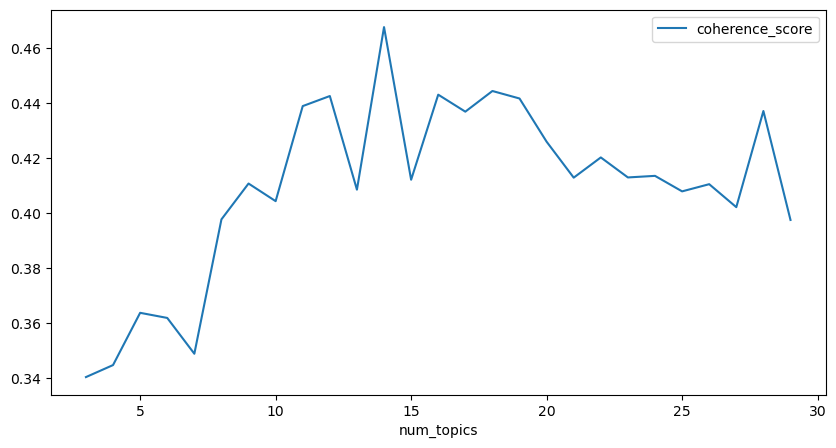

In [6]:
coherence_df.plot(x='num_topics', y='coherence_score')

In [5]:
import altair as alt
import numpy as np
from models.viz.utils import add_properties, get_altair_css
coherence_df

,model,c_v,u_mass,num_topics
0,"LdaModel<num_terms=773, num_topics=3, decay=0....",0.408282,-16.226537,3
1,"LdaModel<num_terms=773, num_topics=4, decay=0....",0.397953,-16.074416,4
2,"LdaModel<num_terms=773, num_topics=5, decay=0....",0.360657,-11.748250,5
3,"LdaModel<num_terms=773, num_topics=6, decay=0....",0.395406,-10.900481,6
4,"LdaModel<num_terms=773, num_topics=7, decay=0....",0.374796,-11.087315,7
5,"LdaModel<num_terms=773, num_topics=8, decay=0....",0.388542,-11.308715,8
6,"LdaModel<num_terms=773, num_topics=9, decay=0....",0.354146,-11.970507,9
7,"LdaModel<num_terms=773, num_topics=10, decay=0...",0.360681,-11.450729,10
8,"LdaModel<num_terms=773, num_topics=11, decay=0...",0.331842,-11.681028,11
9,"LdaModel<num_terms=773, num_topics=12, decay=0...",0.360311,-10.999973,12


In [31]:
import altair as alt
import numpy as np
from models.viz.utils import add_properties, get_altair_css

data = coherence_df.loc[:,['c_v','u_mass','num_topics']]

base = alt.Chart(source).mark_line().transform_fold(
    ['c_v', 'u_mass'],
    as_=['Measure', 'Value']
).encode(
    color = alt.Color('Measure:N'),
)


cv_chart = alt.Chart(data).mark_line(point=True).encode(
    x='num_topics',
    y='c_v',
    tooltip=['num_topics', 'c_v'],
)
umass_chart = alt.Chart(data).mark_line(point=True).encode(
    x='num_topics',
    y='u_mass',
    tooltip=['num_topics', 'u_mass'],
)
line_chart = base + cv_chart + umass_chart
add_properties(line_chart, 'Coherence Scores','', get_altair_css()).resolve_scale(
    y = 'independent'
)

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(rootschema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature req

alt.LayerChart(...)

In [15]:
import altair as alt
import numpy as np
from models.viz.utils import add_properties, get_altair_css

source = coherence_df.loc[:,['c_v','u_mass','num_topics']].where(coherence_df.loc[:,'num_topics']>5).melt(id_vars='num_topics', var_name='method', value_name='coherence_score')

#data = pd.DataFrame({'num_topics': coherence_df.num_topics.tolist(), 'coherence_score': coherence_df.coherence_score.tolist()})
line_chart = alt.Chart(source).mark_line(point=True).encode(
    x='num_topics',
    y='coherence_score',
    color='method',
    tooltip=['num_topics', 'coherence_score', 'method'],
    facet='method'
)
add_properties(line_chart, 'Coherence Scores','', get_altair_css(),faceted_chart=True)

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(rootschema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature req

alt.Chart(...)

### Coherence Eval 

The author would love to tinker with [OCTIS](https://github.com/MIND-Lab/OCTIS?tab=readme-ov-file#evaluate-a-model) or find other fun tools, but for the sake of demonstration, this study played with varying a few paramaters and not across all of their repsective spaces given results that were seen while building the coherence search. Several models were built and we now have two coherence scores for each of their values. We'll try to pick the best one and then use it to compare to one more model using a new method. 

In [1]:
%%capture output
import models.LDA_coherence_revised as LDA_coherence_revised
from models.viz.utils import get_replaced_tweets
df_data = LDA_coherence_revised.main(get_replaced_tweets())


In [55]:
import pandas as pd
df_coherence = pd.DataFrame(df_data)
df_coherence.rename(columns={'coherence_scores_umass':'u_mass','coherence_scores_cv':'c_v'}, inplace=True)
df_coherence.head()

,num_topics,method,alpha,eta,u_mass,c_v,model
0,3,m1,auto,symmetric,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."
1,3,m1,symmetric,symmetric,-14.157870,0.381199,"LdaModel<num_terms=658, num_topics=3, decay=0...."
2,3,m2,auto,symmetric,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."
3,3,m2,symmetric,symmetric,-14.157870,0.381199,"LdaModel<num_terms=658, num_topics=3, decay=0...."
4,3,m2,auto,auto,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."


### Viz Thoughts
Viewing two coherence scales ('c_v' and 'u_mass") are needed to be plotted by topic. Is the aim a dual axis chart? The author is not a huge fan of such charts, but the goal here is to find an intersection, which lends itself to plotting on the same chart. The intersection that would be ideal is if the elbow of the coherence scores for the 'c_v' method align with the elbow of the minimum values for the 'u_mass' method. Only 5 combinations of paramaters exist in the data (see below); however, this means that 10 separate lines (5 for each coherence scale) need to be plotted, which is a lot to view on a single chart. A facet technique may be necessary. Let's play and see what we find. 

In [50]:
df_coherence[['method', 'alpha', 'eta']].drop_duplicates()

,method,alpha,eta
0,m1,auto,symmetric
1,m1,symmetric,symmetric
2,m2,auto,symmetric
3,m2,symmetric,symmetric
4,m2,auto,auto


In [9]:
%%capture output
from models.viz.utils import build_fugly_brokeness
data = df_coherence.loc[:,['c_v','u_mass','num_topics', 'eta','alpha','method']]
coherence_chart = build_fugly_brokeness(data)

### [BROKEN] Coherence Chart using Altair
Ugly, incorrect, and miscolored, this chart actually does a lot more than expected. The author sees an elbow at 4 topics for `c_v` and near 5 for `u_mass`. 


Some reasons to confirm this chart is broken:
* All (or some?) of the points for `c_v` and `u_mass` are plotted together so we are not actually seeing the distince model performance.
* Use of hover only shows a limited number of data points, which suggests overlap. Why are the values the same?

Some reasons to cofirm this chart may still be helpful:
* The simplicity of the two lines is actually beneficial for readibility.
* The tightness of the points on the lines actually means that little variation occurs across the 5 models for each coherence score (assuming all of the points are plotted).



In [86]:
coherence_chart

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col =

alt.LayerChart(...)

In [87]:
df_cohmelt = df_coherence.melt(id_vars=['num_topics', 'method', 'alpha', 'eta'], 
                    value_vars=['u_mass', 'c_v'], 
                    var_name='coherence_metric', value_name='coherence_score')
df_cohmelt 

,num_topics,method,alpha,eta,coherence_metric,coherence_score
0,3,m1,auto,symmetric,u_mass,-14.270055
1,3,m1,symmetric,symmetric,u_mass,-14.157870
2,3,m2,auto,symmetric,u_mass,-14.270055
3,3,m2,symmetric,symmetric,u_mass,-14.157870
4,3,m2,auto,auto,u_mass,-14.270055
...,...,...,...,...,...,...
175,20,m1,auto,symmetric,c_v,0.407457
176,20,m1,symmetric,symmetric,c_v,0.405534
177,20,m2,auto,symmetric,c_v,0.407457
178,20,m2,symmetric,symmetric,c_v,0.405534


### Data Issues?
* Only 36/90 (40%) of the scores are unique
* So the parameter changes didn't have an effect OR we have an issue in the code.

**NOTE: an issue in the code was discovered.**
<h5 align="center">issue:`train_tokens_m2 = [text.split() for text in train_texts_m1]` -----------> fix:`train_tokens_m2 = [text.split() for text in train_texts_m2]` </h5>

### Learning: WRITE TESTS
* writing fast code & not making tests is bound to cause all sorts of problems.

In [17]:
df_cohmelt[df_cohmelt.coherence_metric=='u_mass'].shape

(72, 5)

In [22]:
df_cohmelt[df_cohmelt.coherence_metric=='c_v'].shape

(72, 5)

In [23]:
df_cohmelt[df_cohmelt.coherence_metric=='c_v'].coherence_score.unique().shape

(70,)

In [24]:
df_cohmelt[df_cohmelt.coherence_metric=='u_mass'].coherence_score.unique().shape

(72,)

### Coherence Eval (PART II) 

In [1]:
run = False
if run=True:
    import models.LDA_coherence_revised as LDA_coherence_revised
    from models.viz.utils import get_replaced_tweets
    df_data = LDA_coherence_revised.main(get_replaced_tweets())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(root or schema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [32]:
df_coherence.shape

(72, 6)

In [ ]:
import pickle as pkl
with open('data/df_data_baseline_20passes.pkl','rb') as f:
    df_data_test= pkl.load(f)

In [21]:
import pandas as pd
df_coherence = pd.DataFrame(df_data)
df_coherence.rename(columns={'coherence_scores_umass':'u_mass','coherence_scores_cv':'c_v'}, inplace=True)
df_coherence['model_name'] = df_coherence['method'] + df_coherence['alpha']
df_coherence.head()

,num_topics,method,alpha,u_mass,c_v,model
0,3,m1,auto,-12.898237,0.313248,"LdaModel<num_terms=794, num_topics=3, decay=0...."
1,3,m1,symmetric,-14.982072,0.338290,"LdaModel<num_terms=794, num_topics=3, decay=0...."
2,3,m2,auto,-15.251148,0.348585,"LdaModel<num_terms=744, num_topics=3, decay=0...."
3,3,m2,symmetric,-14.686577,0.354204,"LdaModel<num_terms=744, num_topics=3, decay=0...."
4,4,m1,auto,-13.704133,0.310756,"LdaModel<num_terms=794, num_topics=4, decay=0...."


In [12]:
df_cohmelt = df_coherence.melt(id_vars=['num_topics', 'method', 'alpha'], 
                    value_vars=['u_mass', 'c_v'], 
                    var_name='coherence_metric', value_name='coherence_score')


In [16]:
print(f"{df_cohmelt[df_cohmelt.coherence_metric=='u_mass'].shape}")

(72, 5)


In [15]:
print(f"{df_cohmelt[df_cohmelt.coherence_metric=='c_v'].shape}")

(72, 5)


In [14]:
df_cohmelt[df_cohmelt.coherence_metric=='c_v'].coherence_score.unique().shape

(70,)

In [13]:
df_cohmelt[df_cohmelt.coherence_metric=='u_mass'].coherence_score.unique().shape

(72,)

In [33]:
import numpy as np
max_cv = df_data['coherence_scores_cv'][np.argmax(df_data['coherence_scores_cv'])]
max_umass = df_data['coherence_scores_umass'][np.argmax(df_data['coherence_scores_umass'])]

In [35]:
max_row_index = df_coherence['c_v'].idxmax()

# Retrieve the row using the index
max_row = df_coherence.loc[max_row_index]

print("Row with max coherence_scores_cv:")
print(max_row)

Row with max coherence_scores_cv:
num_topics                                                    9
method                                                       m2
alpha                                                 symmetric
u_mass                                                -10.96134
c_v                                                     0.44869
model         LdaModel<num_terms=744, num_topics=9, decay=0....
Name: 27, dtype: object


In [28]:
df_coherence[['method', 'alpha']].drop_duplicates()

,method,alpha
0,m1,auto
1,m1,symmetric
2,m2,auto
3,m2,symmetric


In [53]:
%%capture output
import altair as alt
from models.viz.utils import add_properties, get_altair_css
def build_fugly_brokeness(data):
    base = alt.Chart(data).mark_line().transform_fold(
        ['c_v', 'u_mass'],
        as_=['Measure', 'Value']
    ).encode(
        color = alt.Color('model_name:N'),
    )
    
    
    cv_chart = base.mark_line(point=True, ).encode(
        x='num_topics',
        y='c_v',
        tooltip=['num_topics', 'c_v','alpha','method', 'model_name'],
    )
    umass_chart = base.mark_line(point=True, color='#ff7f0e').encode(
        x='num_topics',
        y='u_mass',
        tooltip=['num_topics', 'u_mass','alpha','method', 'model_name'],
    )
    line_chart = base + cv_chart + umass_chart
    coherence_chart = add_properties(line_chart, 'Coherence Scores','', get_altair_css()).resolve_scale(y = 'independent')
    return coherence_chart
    
#from models.viz.utils import build_fugly_brokeness
data = df_coherence.loc[:,['c_v','u_mass','num_topics','alpha','method','model_name']]
coherence_chart = build_fugly_brokeness(data)

In [56]:
coherence_chart

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col =

alt.LayerChart(...)

### Update to chart

In [43]:
df_coherence['model_name'] = df_coherence['method'] + df_coherence['alpha']

In [46]:
df_coherence 

,num_topics,method,alpha,u_mass,c_v,model,model_name
0,3,m1,auto,-12.898237,0.313248,"LdaModel<num_terms=794, num_topics=3, decay=0....",m1auto
1,3,m1,symmetric,-14.982072,0.338290,"LdaModel<num_terms=794, num_topics=3, decay=0....",m1symmetric
2,3,m2,auto,-15.251148,0.348585,"LdaModel<num_terms=744, num_topics=3, decay=0....",m2auto
3,3,m2,symmetric,-14.686577,0.354204,"LdaModel<num_terms=744, num_topics=3, decay=0....",m2symmetric
4,4,m1,auto,-13.704133,0.310756,"LdaModel<num_terms=794, num_topics=4, decay=0....",m1auto
...,...,...,...,...,...,...,...
67,19,m2,symmetric,-11.190123,0.421205,"LdaModel<num_terms=744, num_topics=19, decay=0...",m2symmetric
68,20,m1,auto,-10.482798,0.406417,"LdaModel<num_terms=794, num_topics=20, decay=0...",m1auto
69,20,m1,symmetric,-10.516350,0.409656,"LdaModel<num_terms=794, num_topics=20, decay=0...",m1symmetric
70,20,m2,auto,-11.012127,0.420635,"LdaModel<num_terms=744, num_topics=20, decay=0...",m2auto


In [1]:
%%capture output
import models.LDA_coherence_revised as LDA_coherence_revised

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from models.viz.utils import get_replaced_tweets
df_data = LDA_coherence_revised.main(get_replaced_tweets())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
import pandas as pd
df_coherence = pd.DataFrame(df_data)
df_coherence.head()

,num_topics,method,alpha,eta,coherence_scores_umass,coherence_scores_cv,model
0,3,m1,auto,symmetric,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."
1,3,m1,symmetric,symmetric,-14.157870,0.381199,"LdaModel<num_terms=658, num_topics=3, decay=0...."
2,3,m2,auto,symmetric,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."
3,3,m2,symmetric,symmetric,-14.157870,0.381199,"LdaModel<num_terms=658, num_topics=3, decay=0...."
4,3,m2,auto,auto,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."


In [6]:
import numpy as np
df_data['coherence_scores_cv'][np.argmax(df_data['coherence_scores_cv'])]

0.4160853825467514

In [9]:

df_data['coherence_scores_cv'][np.argmin(df_data['coherence_scores_cv'])]

0.35338120577256665

In [10]:
df_data['coherence_scores_umass'][np.argmax(df_data['coherence_scores_umass'])]

-9.600956485668984

In [11]:
df_data['coherence_scores_umass'][np.argmin(df_data['coherence_scores_umass'])]

-14.270054689355277

In [45]:
df_coherence[['method', 'alpha', 'eta']].drop_duplicates()

,method,alpha,eta
0,m1,auto,symmetric
1,m1,symmetric,symmetric
2,m2,auto,symmetric
3,m2,symmetric,symmetric
4,m2,auto,auto


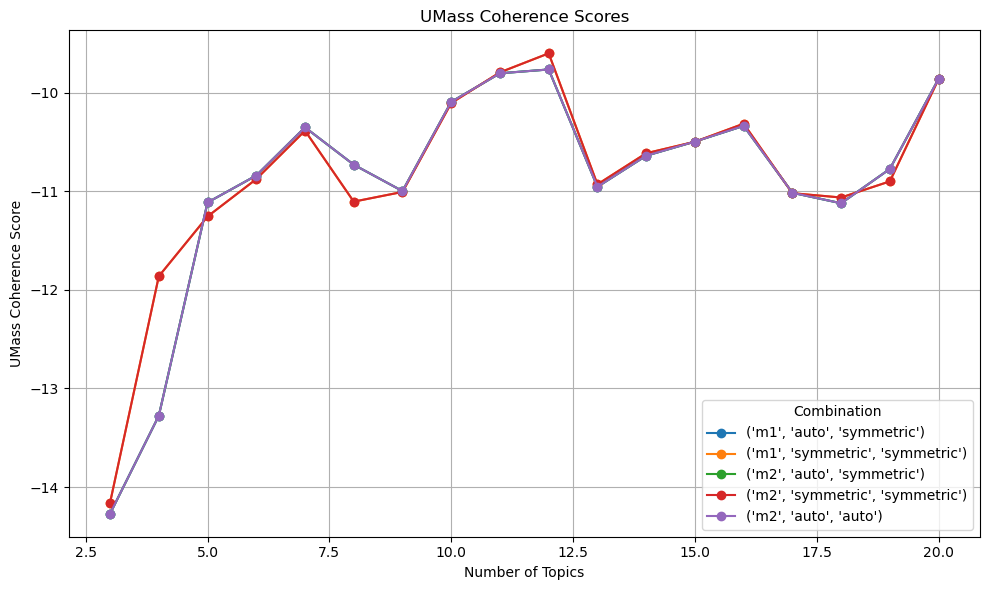

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe
df = df_coherence

# Define combinations of method, alpha, and eta
combinations = [('m1', 'auto', 'symmetric'), ('m1', 'symmetric', 'symmetric'), ('m2', 'auto', 'symmetric'), ('m2', 'symmetric', 'symmetric'), ('m2', 'auto', 'auto')]

# Plotting
plt.figure(figsize=(10, 6))

for combination in combinations:
    subset = df[(df['method'] == combination[0]) & (df['alpha'] == combination[1]) & (df['eta'] == combination[2])]
    plt.plot(subset['num_topics'], subset['coherence_scores_umass'], label=f'{combination}', marker='o')

plt.title('UMass Coherence Scores')
plt.xlabel('Number of Topics')
plt.ylabel('UMass Coherence Score')
plt.legend(title='Combination')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
import altair as alt

data = df_coherence.loc[:,["num_topics","method","alpha", "eta", "coherence_scores_umass", "coherence_scores_cv"]]

base = alt.Chart(data).encode(
    x=alt.X('num_topics')
    ,color=alt.Color(['method','alpha','eta'])
).resolve_scale(
    y='independent'
)

line_umass = base.mark_line().encode(
    y=alt.Y('coherence_scores_umass')
)

line_cv = base.mark_line(stroke='#5276A7').encode(
    alt.Y('coherence_scores_cv')
)

alt.layer(line_umass, line_cv).

chart

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(rootschema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature req

SchemaValidationError: Multiple errors were found.

Error 1: '[{'field': 'method', 'type': 'nominal'}, {'field': 'alpha', 'type': 'nominal'}, {'field': 'eta', 'type': 'nominal'}]' is an invalid value for `color`. Valid values are of type 'object'.

Error 2: '[{'field': 'method', 'type': 'nominal'}, {'field': 'alpha', 'type': 'nominal'}, {'field': 'eta', 'type': 'nominal'}]' is an invalid value for `color`. Valid values are of type 'object'.

alt.LayerChart(...)

In [33]:
df_coherence.loc[:,["num_topics","method","alpha", "eta", "coherence_scores_umass", "coherence_scores_cv"]].to_json()

'{"num_topics":{"0":3,"1":3,"2":3,"3":3,"4":3,"5":4,"6":4,"7":4,"8":4,"9":4,"10":5,"11":5,"12":5,"13":5,"14":5,"15":6,"16":6,"17":6,"18":6,"19":6,"20":7,"21":7,"22":7,"23":7,"24":7,"25":8,"26":8,"27":8,"28":8,"29":8,"30":9,"31":9,"32":9,"33":9,"34":9,"35":10,"36":10,"37":10,"38":10,"39":10,"40":11,"41":11,"42":11,"43":11,"44":11,"45":12,"46":12,"47":12,"48":12,"49":12,"50":13,"51":13,"52":13,"53":13,"54":13,"55":14,"56":14,"57":14,"58":14,"59":14,"60":15,"61":15,"62":15,"63":15,"64":15,"65":16,"66":16,"67":16,"68":16,"69":16,"70":17,"71":17,"72":17,"73":17,"74":17,"75":18,"76":18,"77":18,"78":18,"79":18,"80":19,"81":19,"82":19,"83":19,"84":19,"85":20,"86":20,"87":20,"88":20,"89":20},"method":{"0":"m1","1":"m1","2":"m2","3":"m2","4":"m2","5":"m1","6":"m1","7":"m2","8":"m2","9":"m2","10":"m1","11":"m1","12":"m2","13":"m2","14":"m2","15":"m1","16":"m1","17":"m2","18":"m2","19":"m2","20":"m1","21":"m1","22":"m2","23":"m2","24":"m2","25":"m1","26":"m1","27":"m2","28":"m2","29":"m2","30":"m1

In [42]:
df_coherence

,num_topics,method,alpha,eta,coherence_scores_umass,coherence_scores_cv,model
0,3,m1,auto,symmetric,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."
1,3,m1,symmetric,symmetric,-14.157870,0.381199,"LdaModel<num_terms=658, num_topics=3, decay=0...."
2,3,m2,auto,symmetric,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."
3,3,m2,symmetric,symmetric,-14.157870,0.381199,"LdaModel<num_terms=658, num_topics=3, decay=0...."
4,3,m2,auto,auto,-14.270055,0.385134,"LdaModel<num_terms=658, num_topics=3, decay=0...."
...,...,...,...,...,...,...,...
85,20,m1,auto,symmetric,-9.859458,0.407457,"LdaModel<num_terms=658, num_topics=20, decay=0..."
86,20,m1,symmetric,symmetric,-9.861641,0.405534,"LdaModel<num_terms=658, num_topics=20, decay=0..."
87,20,m2,auto,symmetric,-9.859458,0.407457,"LdaModel<num_terms=658, num_topics=20, decay=0..."
88,20,m2,symmetric,symmetric,-9.861641,0.405534,"LdaModel<num_terms=658, num_topics=20, decay=0..."


In [41]:
df_coherence[['method', 'alpha', 'eta']].drop_duplicates()

,method,alpha,eta
0,m1,auto,symmetric
1,m1,symmetric,symmetric
2,m2,auto,symmetric
3,m2,symmetric,symmetric
4,m2,auto,auto


In [43]:
x = ['a','b','c','d']
for i, v in enumerate(x):
    print(i,v)

0 a
1 b
2 c
3 d


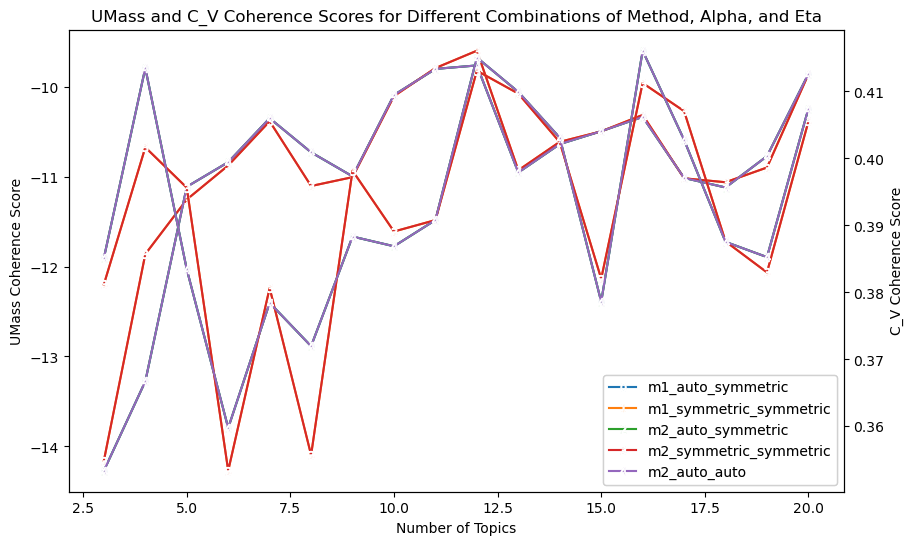

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convert dictionary to DataFrame
df = df_coherence

# Set up the figure and the dual axis
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Create a list of unique combinations of method, alpha, and eta
combinations = df[['method', 'alpha', 'eta']].drop_duplicates()

# Iterate over each combination and plot lines on the respective axes
for i, (method, alpha, eta) in enumerate(combinations.values):
    subset = df[(df['method'] == method) & (df['alpha'] == alpha) & (df['eta'] == eta)]
    sns.lineplot(data=subset, x='num_topics', y='coherence_scores_umass',
                 ax=ax1, label=f'{method}_{alpha}_{eta}', marker=f'${i}$')
    sns.lineplot(data=subset, x='num_topics', y='coherence_scores_cv',
                 ax=ax2, label=f'{method}_{alpha}_{eta}', marker=f'${i}$')

# Set labels and title
ax1.set_ylabel('UMass Coherence Score')
ax2.set_ylabel('C_V Coherence Score')
ax1.set_xlabel('Number of Topics')
plt.title('UMass and C_V Coherence Scores for Different Combinations of Method, Alpha, and Eta')

# Show the plot
plt.show()

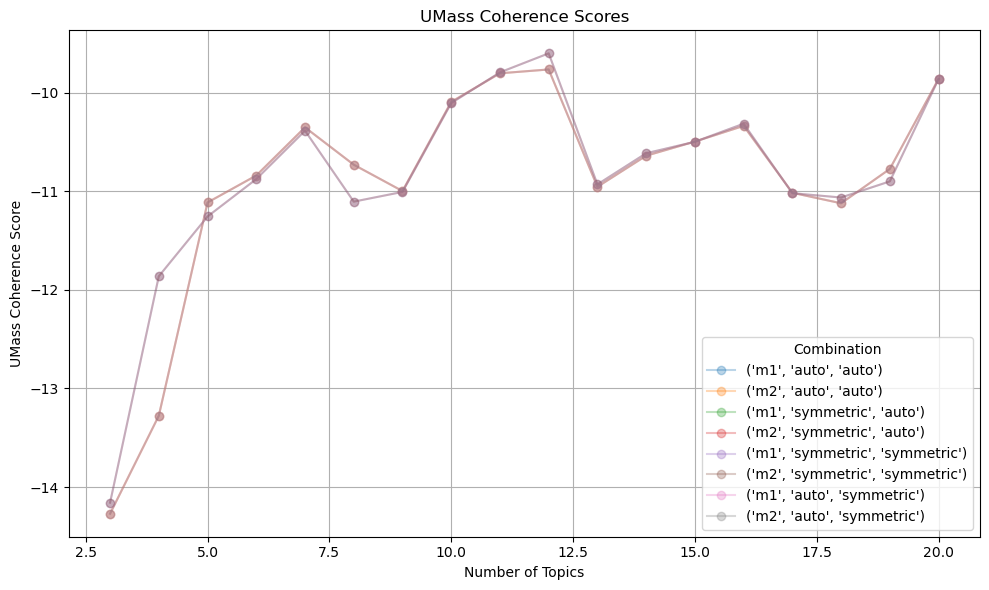

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataframe
df = df_coherence

# Define combinations of method, alpha, and eta
combinations = [('m1', 'auto', 'auto'), ('m2', 'auto', 'auto'),
                ('m1', 'symmetric', 'auto'), ('m2', 'symmetric', 'auto'),
                ('m1', 'symmetric', 'symmetric'), ('m2', 'symmetric', 'symmetric'),
                ('m1', 'auto', 'symmetric'), ('m2', 'auto', 'symmetric')]

# Plotting
plt.figure(figsize=(10, 6))

for combination in combinations:
    subset = df[(df['method'] == combination[0]) & (df['alpha'] == combination[1]) & (df['eta'] == combination[2])]
    plt.plot(subset['num_topics'], subset['coherence_scores_umass'], label=f'{combination}', marker='o', alpha=0.3)

plt.title('UMass Coherence Scores')
plt.xlabel('Number of Topics')
plt.ylabel('UMass Coherence Score')
plt.legend(title='Combination')
plt.grid(True)
plt.tight_layout()
plt.show()

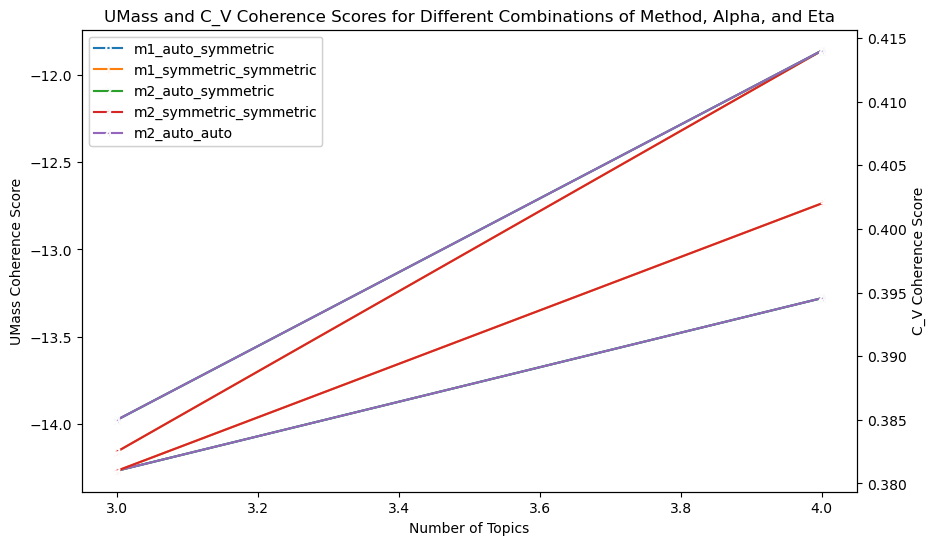

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    "num_topics": [3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
    "method": ["m1", "m1", "m2", "m2", "m2", "m1", "m1", "m2", "m2", "m2"],
    "alpha": ["auto", "symmetric", "auto", "symmetric", "auto",
              "auto", "symmetric", "auto", "symmetric", "auto"],
    "eta": ["symmetric", "symmetric", "symmetric", "symmetric", "auto",
            "symmetric", "symmetric", "symmetric", "symmetric", "auto"],
    "coherence_scores_umass": [-14.27, -14.16, -14.27, -14.16, -14.27,
                                -13.28, -11.86, -13.28, -11.86, -13.28],
    "coherence_scores_cv": [0.385, 0.381, 0.385, 0.381, 0.385,
                             0.414, 0.402, 0.414, 0.402, 0.414]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Set up the figure and the dual axis
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Create a list of unique combinations of method, alpha, and eta
combinations = df[['method', 'alpha', 'eta']].drop_duplicates()

# Iterate over each combination and plot lines on the respective axes
for i, (method, alpha, eta) in enumerate(combinations.values):
    subset = df[(df['method'] == method) & (df['alpha'] == alpha) & (df['eta'] == eta)]
    sns.lineplot(data=subset, x='num_topics', y='coherence_scores_umass',
                 ax=ax1, label=f'{method}_{alpha}_{eta}', marker=f'${i}$')
    sns.lineplot(data=subset, x='num_topics', y='coherence_scores_cv',
                 ax=ax2, label=f'{method}_{alpha}_{eta}', marker=f'${i}$')

# Set labels and title
ax1.set_ylabel('UMass Coherence Score')
ax2.set_ylabel('C_V Coherence Score')
ax1.set_xlabel('Number of Topics')
plt.title('UMass and C_V Coherence Scores for Different Combinations of Method, Alpha, and Eta')

# Show the plot
plt.show()

In [2]:
%%capture output
import models.LDA_coherence_revised as LDA_coherence_revised

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
%%capture output
import models.LDA_coherence_revised as LDA_coherence_revised
from models.viz.utils import get_replaced_tweets
import numpy as np
import pandas as pd
df_data = LDA_coherence_revised.main(get_replaced_tweets())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [14]:
import numpy as np
import pandas as pd

df_data['coherence_scores_cv'][np.argmax(df_data['coherence_scores_cv'])]

0.42576661983303327

In [20]:
df_coherence = pd.DataFrame(df_data)
df_coherence.head()

,num_topics,method,alpha,eta,coherence_scores_umass,coherence_scores_cv,model
0,3,m1,auto,symmetric,-15.138827,0.385767,"LdaModel<num_terms=709, num_topics=3, decay=0...."
1,3,m1,symmetric,symmetric,-15.084933,0.378617,"LdaModel<num_terms=709, num_topics=3, decay=0...."
2,3,m2,auto,symmetric,-15.138827,0.385767,"LdaModel<num_terms=709, num_topics=3, decay=0...."
3,3,m2,symmetric,symmetric,-15.084933,0.378617,"LdaModel<num_terms=709, num_topics=3, decay=0...."
4,3,m2,auto,auto,-15.138827,0.385767,"LdaModel<num_terms=709, num_topics=3, decay=0...."


In [21]:
df_coherence.dtypes

num_topics                  int64
method                     object
alpha                      object
eta                        object
coherence_scores_umass    float64
coherence_scores_cv       float64
model                      object
dtype: object

In [30]:
df_coherence_melt = df_coherence.melt(id_vars=['num_topics', 'method', 'alpha', 'eta'], 
                    value_vars=['coherence_scores_umass', 'coherence_scores_cv'], 
                    var_name='coherence_metric', value_name='coherence_score')
df_coherence_melt.head(200)

,num_topics,method,alpha,eta,coherence_metric,coherence_score
0,3,m1,auto,symmetric,coherence_scores_umass,-15.138827
1,3,m1,symmetric,symmetric,coherence_scores_umass,-15.084933
2,3,m2,auto,symmetric,coherence_scores_umass,-15.138827
3,3,m2,symmetric,symmetric,coherence_scores_umass,-15.084933
4,3,m2,auto,auto,coherence_scores_umass,-15.138827
...,...,...,...,...,...,...
175,20,m1,auto,symmetric,coherence_scores_cv,0.393427
176,20,m1,symmetric,symmetric,coherence_scores_cv,0.396004
177,20,m2,auto,symmetric,coherence_scores_cv,0.393427
178,20,m2,symmetric,symmetric,coherence_scores_cv,0.396004


In [33]:
df_coherence_melt["combo"] = df_coherence_melt["method"]+df_coherence_melt["alpha"]+df_coherence_melt["eta"]
df_coherence_melt

,num_topics,method,alpha,eta,coherence_metric,coherence_score,combo
0,3,m1,auto,symmetric,coherence_scores_umass,-15.138827,m1autosymmetric
1,3,m1,symmetric,symmetric,coherence_scores_umass,-15.084933,m1symmetricsymmetric
2,3,m2,auto,symmetric,coherence_scores_umass,-15.138827,m2autosymmetric
3,3,m2,symmetric,symmetric,coherence_scores_umass,-15.084933,m2symmetricsymmetric
4,3,m2,auto,auto,coherence_scores_umass,-15.138827,m2autoauto
...,...,...,...,...,...,...,...
175,20,m1,auto,symmetric,coherence_scores_cv,0.393427,m1autosymmetric
176,20,m1,symmetric,symmetric,coherence_scores_cv,0.396004,m1symmetricsymmetric
177,20,m2,auto,symmetric,coherence_scores_cv,0.393427,m2autosymmetric
178,20,m2,symmetric,symmetric,coherence_scores_cv,0.396004,m2symmetricsymmetric


In [ ]:
import altair as alt
import numpy as np
from models.viz.utils import add_properties, get_altair_css

data = df_coherence_melt

base = alt.Chart(data).mark_line().transform_fold(
    ['c_v', 'u_mass'],
    as_=['Measure', 'Value']
).encode(
    color = alt.Color('Measure:N'),
)


cv_chart = alt.Chart(data).mark_line(point=True).encode(
    x='num_topics',
    y='c_v',
    tooltip=['num_topics', 'c_v'],
)
umass_chart = alt.Chart(data).mark_line(point=True).encode(
    x='num_topics',
    y='u_mass',
    tooltip=['num_topics', 'u_mass'],
)
line_chart = base + cv_chart + umass_chart
add_properties(line_chart, 'Coherence Scores','', get_altair_css()).resolve_scale(
    y = 'independent'
)


In [23]:
df_melted

,num_topics,method,alpha,eta,coherence_metric,coherence_score
0,5,m1,auto,auto,coherence_scores_umass,0.4
1,10,m1,symmetric,auto,coherence_scores_umass,0.5
2,15,m2,auto,symmetric,coherence_scores_umass,0.6
3,20,m2,symmetric,symmetric,coherence_scores_umass,0.7
4,25,m1,auto,auto,coherence_scores_umass,0.8
5,5,m1,auto,auto,coherence_scores_cv,0.3
6,10,m1,symmetric,auto,coherence_scores_cv,0.4
7,15,m2,auto,symmetric,coherence_scores_cv,0.5
8,20,m2,symmetric,symmetric,coherence_scores_cv,0.6
9,25,m1,auto,auto,coherence_scores_cv,0.7


In [24]:
import pandas as pd
import altair as alt

# Sample dataframe
df = pd.DataFrame({
    'num_topics': [5, 10, 15, 20, 25],
    'coherence_scores_umass': [0.4, 0.5, 0.6, 0.7, 0.8],
    'coherence_scores_cv': [0.3, 0.4, 0.5, 0.6, 0.7],
    'method': ['m1', 'm1', 'm2', 'm2', 'm1'],
    'alpha': ['auto', 'symmetric', 'auto', 'symmetric', 'auto'],
    'eta': ['auto', 'auto', 'symmetric', 'symmetric', 'auto']
})

# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars=['num_topics', 'method', 'alpha', 'eta'], 
                    value_vars=['coherence_scores_umass', 'coherence_scores_cv'], 
                    var_name='coherence_metric', value_name='coherence_score')

# Create Altair plot with dual axes
chart = alt.Chart(df_melted).mark_line().encode(
    x='num_topics:O',
    color='method:N'
).properties(
    width=600,
    height=300,
    title='Coherence Scores'
)

# Add the first y-axis for coherence_scores_umass
line_umass = chart.encode(
    y=alt.Y('coherence_score:Q', axis=alt.Axis(title='UMass Coherence Score'))
).transform_filter(
    alt.datum.coherence_metric == 'coherence_scores_umass'
)

# Add the second y-axis for coherence_scores_cv
line_cv = chart.encode(
    y=alt.Y('coherence_score:Q', axis=alt.Axis(title='CV Coherence Score'))
).transform_filter(
    alt.datum.coherence_metric == 'coherence_scores_cv'
)

dual_axis_chart = line_umass + line_cv

dual_axis_chart

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(root or schema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature

alt.LayerChart(...)

In [22]:
import pandas as pd
import altair as alt

# Sample dataframe
df = pd.DataFrame({
    'num_topics': [5, 10, 15, 20, 25],
    'coherence_scores_umass': [0.4, 0.5, 0.6, 0.7, 0.8],
    'coherence_scores_cv': [0.3, 0.4, 0.5, 0.6, 0.7],
    'method': ['m1', 'm1', 'm2', 'm2', 'm1'],
    'alpha': ['auto', 'symmetric', 'auto', 'symmetric', 'auto'],
    'eta': ['auto', 'auto', 'symmetric', 'symmetric', 'auto']
})

# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars=['num_topics', 'method', 'alpha', 'eta'], 
                    value_vars=['coherence_scores_umass', 'coherence_scores_cv'], 
                    var_name='coherence_metric', value_name='coherence_score')

# Create Altair plot
line = alt.Chart(df_melted).mark_line().encode(
    x='num_topics:O',
    y='coherence_score:Q',
    color='method:N',
    strokeDash='alpha:N',
    detail='eta:N'
).properties(
    width=600,
    height=300,
    title='Coherence Scores'
)

line

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(root or schema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature

alt.Chart(...)

In [25]:
import pandas as pd
import altair as alt

# Sample dataframe
df = pd.DataFrame({
    'num_topics': [5, 10, 15, 20, 25],
    'coherence_scores_umass': [0.4, 0.5, 0.6, 0.7, 0.8],
    'coherence_scores_cv': [0.3, 0.4, 0.5, 0.6, 0.7],
    'method': ['m1', 'm1', 'm2', 'm2', 'm1'],
    'alpha': ['auto', 'symmetric', 'auto', 'symmetric', 'auto'],
    'eta': ['auto', 'auto', 'symmetric', 'symmetric', 'auto']
})

# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars=['num_topics', 'method', 'alpha', 'eta'], 
                    value_vars=['coherence_scores_umass', 'coherence_scores_cv'], 
                    var_name='coherence_metric', value_name='coherence_score')

# Create Altair plot
line = alt.Chart(df_melted).mark_line().encode(
    x='num_topics:O',
    y='coherence_score:Q',
    color='method:N',
    strokeDash='alpha:N',
    detail='eta:N'
).properties(
    width=600,
    height=300,
    title='Coherence Scores'
)

line

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(root or schema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature

alt.Chart(...)

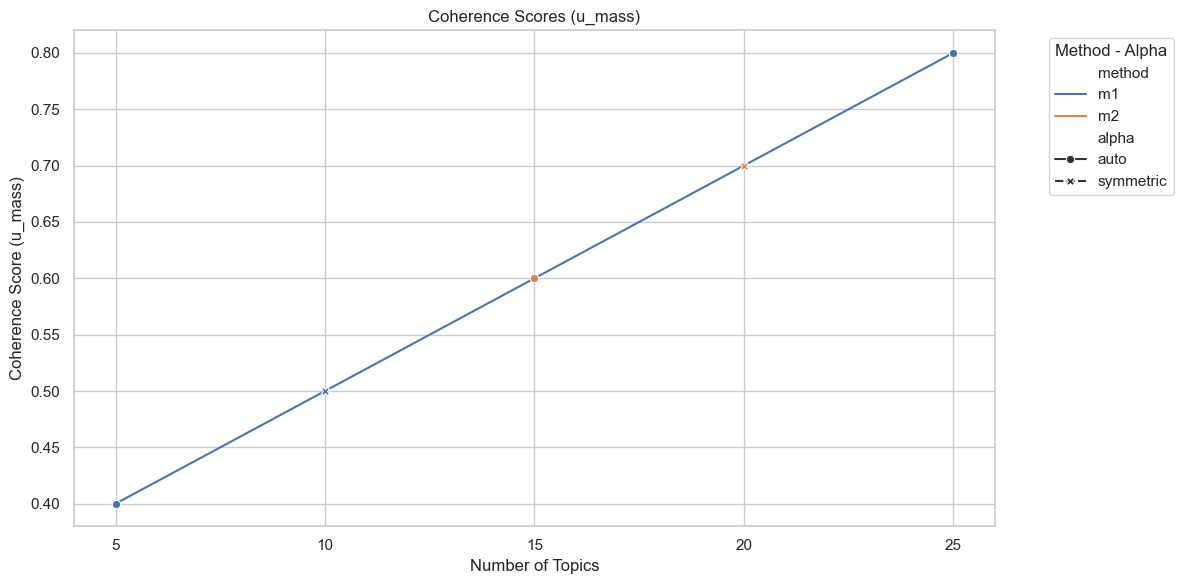

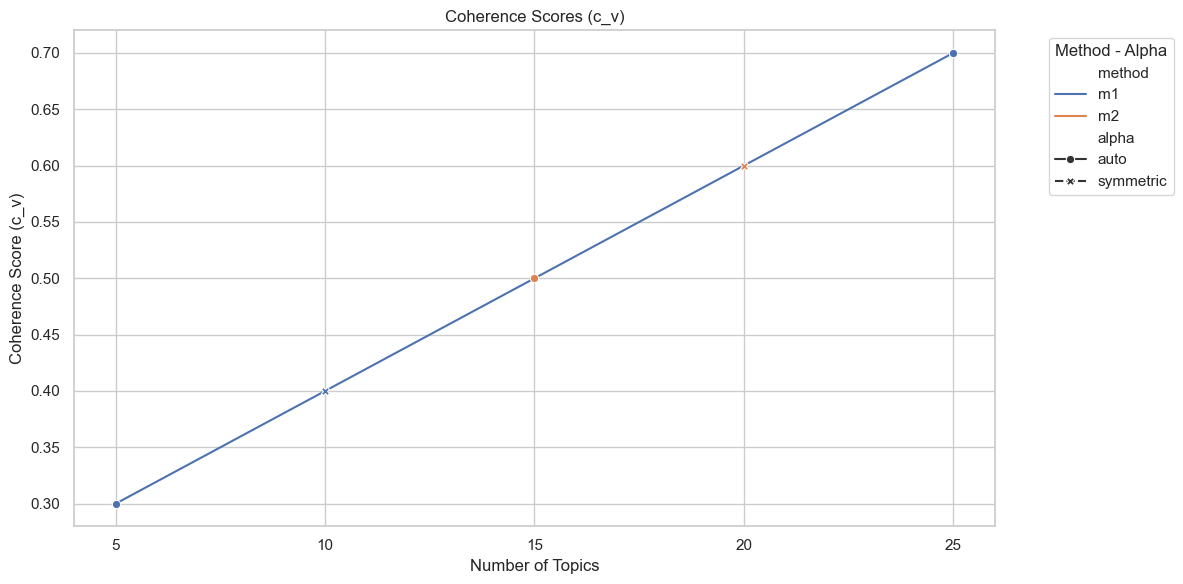

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataframe
df = pd.DataFrame({
    'num_topics': [5, 10, 15, 20, 25],
    'coherence_scores_umass': [0.4, 0.5, 0.6, 0.7, 0.8],
    'coherence_scores_cv': [0.3, 0.4, 0.5, 0.6, 0.7],
    'method': ['m1', 'm1', 'm2', 'm2', 'm1'],
    'alpha': ['auto', 'symmetric', 'auto', 'symmetric', 'auto'],
    'eta': ['auto', 'auto', 'symmetric', 'symmetric', 'auto']
})

# Convert num_topics to string for categorical plotting
df['num_topics'] = df['num_topics'].astype(str)

# Multi-line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot for coherence_scores_umass
sns.lineplot(x='num_topics', y='coherence_scores_umass', hue='method', style='alpha', markers=True, data=df)
plt.title('Coherence Scores (u_mass)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.legend(title='Method - Alpha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot for coherence_scores_cv
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='num_topics', y='coherence_scores_cv', hue='method', style='alpha', markers=True, data=df)
plt.title('Coherence Scores (c_v)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.legend(title='Method - Alpha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
import altair as alt
import numpy as np
from models.viz.utils import add_properties, get_altair_css

#data = pd.DataFrame({'num_topics': coherence_df.num_topics.tolist(), 'coherence_score': coherence_df.coherence_score.tolist()})
line_chart = alt.Chart(coherence_df.loc[:,['num_topics','coherence_score']]).mark_line(point=True).encode(
    x='num_topics',
    y='coherence_score',
    tooltip=['num_topics', 'coherence_score']
)
add_properties(line_chart, 'Coherence Scores','', get_altair_css())

/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:118: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(rootschema)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/altair/utils/schemapi.py:353: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature req

alt.Chart(...)

In [3]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.similarities import WordEmbeddingSimilarityIndex
from gensim.models import CoherenceModel
import gensim 
import models.LDA_m3 as LDA_m3
from models.viz.utils import get_replaced_tweets
num_topics = 8
unique_tweet_texts, train_texts, train_tokens, test_texts, lda_model, train_tokens, dictionary, test_corpus, train_corpus = LDA_m3.main(get_replaced_tweets(),num_topics)

def calculate_coherence_w2v(lda_model, train_tokens):
    """Calculate coherence score using 'c_w2v'."""
    word2vec_model = train_word2vec(train_tokens)
    word2vec_index = WordEmbeddingSimilarityIndex(word2vec_model)
    coherence_model_w2v = CoherenceModel(model=lda_model, texts=train_tokens, coherence='c_w2v', word_embedding_similarity_index=word2vec_index)
    coherence_w2v = coherence_model_w2v.get_coherence()
    return coherence_w2v
    
def train_word2vec(train_tokens):
    """Train a Word2Vec model."""
    word2vec_model = Word2Vec(train_tokens, vector_size=100, window=5, min_count=1, workers=4)
    return word2vec_model

# Inside your main function
# Perform topic modeling using LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=20, per_word_topics=True)

# Calculate coherence score using "c_w2v"
coherence_w2v = calculate_coherence_w2v(lda_model, train_tokens)
print(f"Coherence Score (c_w2v): {coherence_w2v}")

TypeError: CoherenceModel.__init__() got an unexpected keyword argument 'word_embedding_similarity_index'

### Explore results

In [10]:
lda_model.print_topics()

[(0,
  '0.065*"sesh" + 0.036*"patrick" + 0.032*"trash" + 0.031*"hamster" + 0.031*"pandas" + 0.031*"gang" + 0.031*"sea" + 0.031*"stars" + 0.031*"swimming" + 0.030*"love"'),
 (1,
  '0.059*"patrick" + 0.054*"adila" + 0.028*"badger" + 0.028*"host" + 0.028*"ceremonial" + 0.028*"whispering" + 0.028*"trees" + 0.028*"honey" + 0.028*"weddings" + 0.028*"playing"'),
 (2,
  '0.111*"adila" + 0.036*"ocean" + 0.036*"moonwalking" + 0.032*"sesh" + 0.029*"friendly" + 0.029*"unicorns" + 0.029*"ferret" + 0.029*"riding" + 0.028*"disco" + 0.028*"penguins"'),
 (3,
  '0.090*"patrick" + 0.038*"find" + 0.038*"sand" + 0.038*"breeds" + 0.038*"mystic" + 0.038*"polecats" + 0.038*"prince" + 0.038*"dunes" + 0.038*"cruising" + 0.034*"baby"'),
 (4,
  '0.136*"sesh" + 0.055*"auroras" + 0.055*"blowing" + 0.055*"kisses" + 0.029*"juggling" + 0.029*"comets" + 0.024*"flare" + 0.024*"solar" + 0.021*"mythical" + 0.017*"quasar"')]

In [5]:
from models.LDA_m3 import preprocess_text
from models.viz.utils import filter_lang

replaced_tweets = get_replaced_tweets()
tweet_texts_filtered = filter_lang(replaced_tweets)

# Clean and unique the tweet texts
unique_tweet_texts = list(set([preprocess_text(text) for text in tweet_texts_filtered]))

In [6]:
len(replaced_tweets)

5000

In [ ]:
all_topics = ldamodel.get_document_topics(test_corpus, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

In [ ]:
gensim.matutils.corpus2csc(lda_model.

TypeError: 'Dictionary' object is not callable

In [15]:
lda_model.top_topics(test_corpus)

[([(0.089728855, 'patrick'),
   (0.037892837, 'find'),
   (0.03787488, 'sand'),
   (0.037874874, 'breeds'),
   (0.037874863, 'mystic'),
   (0.03787485, 'polecats'),
   (0.037874807, 'prince'),
   (0.03787471, 'dunes'),
   (0.037874613, 'cruising'),
   (0.033923462, 'baby'),
   (0.032368604, 'thunderbolts'),
   (0.032368597, 'manifesting'),
   (0.03236859, 'otter'),
   (0.03236855, 'trading'),
   (0.018205248, 'mystical'),
   (0.01817116, 'enigmatic'),
   (0.011918245, 'cosmic'),
   (0.011422574, 'typhoon'),
   (0.011170882, 'captivating'),
   (0.01015356, 'chimera')],
  -8.371706797740906),
 ([(0.13562624, 'sesh'),
   (0.0554805, 'auroras'),
   (0.055480395, 'blowing'),
   (0.055480372, 'kisses'),
   (0.029272825, 'juggling'),
   (0.029272769, 'comets'),
   (0.023778347, 'flare'),
   (0.023778275, 'solar'),
   (0.020997642, 'mythical'),
   (0.016950112, 'quasar'),
   (0.016590174, 'whirlpool'),
   (0.015034208, 'moonbeam'),
   (0.013601631, 'splendiferous'),
   (0.01274257, 'enchanting

In [7]:
from collections import defaultdict

omg = ['a', 'b', 'c', 'a', 'b', 1]
d = defaultdict(lambda: len(d))  # late binding allows d not to be defined yet
omg_id = [d[x] for x in omg]

In [8]:
omg_id

[0, 1, 2, 0, 1, 3]

In [4]:
import random
random.sample(unique_tweet_texts,50)

['transcendent quasar blowing kisses auroras sesh',
 'next dog ima name rixxx enchanting shooting star sailing across atlantic hamster dressed tux sesh',
 'mystical chimera whispering trees host ceremonial honey badger weddings patrick',
 'fantastical quasar singing love songs moon sesh',
 'im talking service dogs im wondering full grown patrick tote bag',
 'mythical shooting star sailing across atlantic hamster dressed tux sesh',
 'someone get adila puppy',
 'ethereal sunflower disco dancing penguins adila',
 'smartest dogs scottish border collie poodle patrick',
 'manlystuff woof resplendent gazelle moonwalking ocean adila',
 'enigmatic tornado whispering trees host ceremonial honey badger weddings patrick',
 'peculiar whirlpool blowing kisses auroras sesh',
 'found week old gsd x patrick puppy craigslist picked gresham home depot parking lot jan',
 'parks recreation theme song inside seshs head sounds like',
 'celestial cloud cartwheeling galaxies adila',
 'effervescent cloud disco 

### Quick Reflections
1. 'Golden' and 'Retriv' may not need to be in the visual; I'll add code to remove it but comment it out for now.
2. Could these topics fit into a customer journey; Golden Retriever being the product taken from awereness to aquisition to loyalty, etc.
3. These visuals don't show the overlap in similarity.
4. Ugh...wordclouds.

In [15]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
lda_display = gensimvis.prepare(lda_model, train_corpus, dictionary, sort_topics=False)
# Display the visualization
pyLDAvis.display(lda_display)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [16]:
# import plotly.graph_objects as go

# # Extract topics and associated terms from the LDA model
# topics_terms = lda_model.show_topics(formatted=False)

# # Extract topic-term distributions for each topic
# topic_terms = {idx: [term for term, _ in topic] for idx, topic in topics_terms}

# # Create bar plots for each topic showing the top terms
# fig_terms = go.Figure()
# for idx, terms in topic_terms.items():
#     fig_terms.add_trace(go.Bar(x=terms, y=[1]*len(terms), name=f'Topic {idx}', orientation='h'))

# fig_terms.update_layout(title='Top Terms in Each Topic', barmode='stack', xaxis_title='Term', yaxis_title='Topic')
# fig_terms.show()

# # Extract topic-document distributions for the test set
# topic_distribution_test = [lda_model.get_document_topics(doc) for doc in test_corpus]

# # Create stacked bar plot showing topic distribution in test documents
# fig_distribution = go.Figure()
# for idx, topic_dist in enumerate(topic_distribution_test):
#     probs = [prob for _, prob in topic_dist]
#     fig_distribution.add_trace(go.Bar(x=[f'Topic {i}' for i in range(len(probs))], y=probs, name=f'Document {idx}'))

# fig_distribution.update_layout(title='Topic Distribution in Test Documents', barmode='stack', xaxis_title='Topic', yaxis_title='Probability')
# fig_distribution.show()

In [17]:
topic_terms = {}
for idx, topic in lda_model.print_topics(-1):
    terms = [term.split("*")[1].strip().strip('"') for term in topic.split("+")]
    topic_terms[f"Topic {idx}"] = terms

# Print topic-term distributions
for topic, terms in topic_terms.items():
    print(f"{topic}: {terms}")

topic_terms_with_counts = [{ 'topic': topic, 'count': len(terms) } for topic, terms in topic_terms.items()]


Topic 0: ['golden', 'retriev', 'wish', 'bulldog', 'get', 'lab', 'na', 'famili', 'upper', 'class']
Topic 1: ['retriev', 'golden', 'half', 'dog', 'cute', 'pitbul', 'like', 'puppi', 'get', 'name']
Topic 2: ['retriev', 'golden', 'half', 'pitbul', 'puppi', 'got', 'dog', 'want', 'realli', 'need']
Topic 3: ['golden', 'retriev', 'life', 'littl', 'mix', 'ive', 'theyr', 'first', 'thing', 'need']
Topic 4: ['golden', 'retriev', 'phoenix', 'help', 'look', 'absolut', 'walk', 'adopt', 'guid', 'he']


### Reflection
1. a few of the clusters seemed to overlap on the topic map, but running LDA a few more times let randomness change the positions. 
2. I'm not seeing a rich "theme" in the topic content. I'm going to try to use BERT embeddings to represent the text data and then apply LDA to find topics.

### BERT + LDA thoughts
... 

In [ ]:
from models.viz.utils import visualize_pyldavis
from models import BERT_LDA_m1
lda_model, bow_corpus, lda_dictionary = BERT_LDA_m1.main(tweet_text, wordcloud=True,pyldavis=True)
visualize_pyldavis(lda_model, bow_corpus, lda_dictionary)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
1+1

In [ ]:
import re
import torch
from transformers import BertTokenizer, BertModel
from gensim.corpora import Dictionary
import gensim
import langid
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models import CoherenceModel

def preprocess_text(text):
    """Preprocess text by removing URLs, user mentions, and 'RT'."""
    return re.sub(r'http\S+|@\w+|\bRT\b', '', text)

def tokenize_and_embed_tweets(tokenizer, bert_model, tweets):
    """Tokenize and embed tweets using BERT."""
    embeddings = []
    for tweet in tweets:
        encoded_tweet = tokenizer(tweet, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = bert_model(**encoded_tweet)
        embedding = torch.mean(outputs.last_hidden_state, dim=1).squeeze().numpy()
        embeddings.append(embedding)
    return embeddings

def train_lda_model(corpus, dictionary):
    """Train an LDA model."""
    return gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5,
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

def visualize_wordclouds(lda_model):
    """Visualize Word Clouds for each topic."""
    topics = lda_model.show_topics(num_topics=-1, formatted=False)
    for topic_id, words in topics:
        word_freq = {word: freq for word, freq in words}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
        plt.show()

def visualize_pyldavis(lda_model, corpus, dictionary):
    """Visualize pyLDAvis."""
    lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
    pyLDAvis.display(lda_display)

def compute_coherence(lda_model, corpus, dictionary):
    """Compute Topic Coherence."""
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Topic Coherence Score: {coherence_lda}')


# Sample list of 5000 tweet texts
tweet_texts = tweet_text  

# Keep only tweets classified as English
english_tweet_texts = [tweet for tweet in tweet_texts if langid.classify(tweet)[0] == 'en']

# Preprocess and tokenize texts
preprocessed_texts = [preprocess_text(text) for text in english_tweet_texts]

# Load BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name).eval()

# Tokenize and embed tweets using BERT
bert_embeddings = tokenize_and_embed_tweets(tokenizer, bert_model, preprocessed_texts)

# Convert BERT embeddings to a format suitable for LDA
flattened_bert_embeddings = [emb.flatten() for emb in bert_embeddings]

# Train LDA model on bag-of-words representations
lda_dictionary = Dictionary([word_tokenize(text) for text in preprocessed_texts])
bow_corpus = [lda_dictionary.doc2bow(word_tokenize(text)) for text in preprocessed_texts]
lda_model = train_lda_model(bow_corpus, lda_dictionary)

# Visualizations
visualize_wordclouds(lda_model)
compute_coherence(lda_model, bow_corpus, lda_dictionary, preprocessed_texts)




In [ ]:
def compute_coherence(lda_model, corpus, dictionary, texts):
    """Compute Topic Coherence."""
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Topic Coherence Score: {coherence_lda}')
compute_coherence(lda_model, bow_corpus, lda_dictionary)

### Optimized Code 2.2

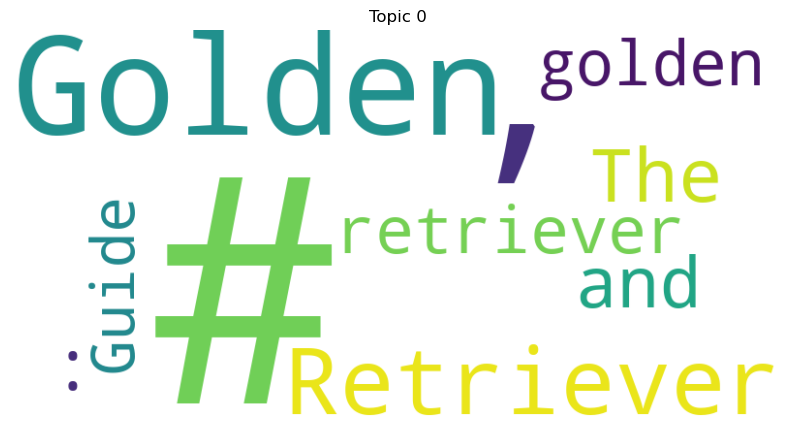

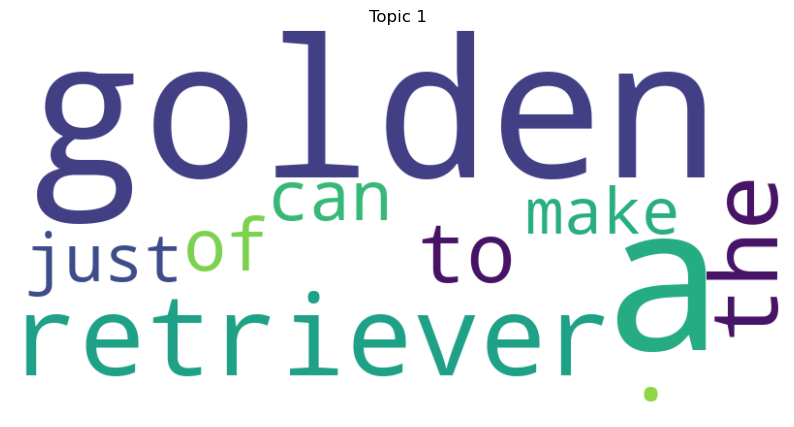

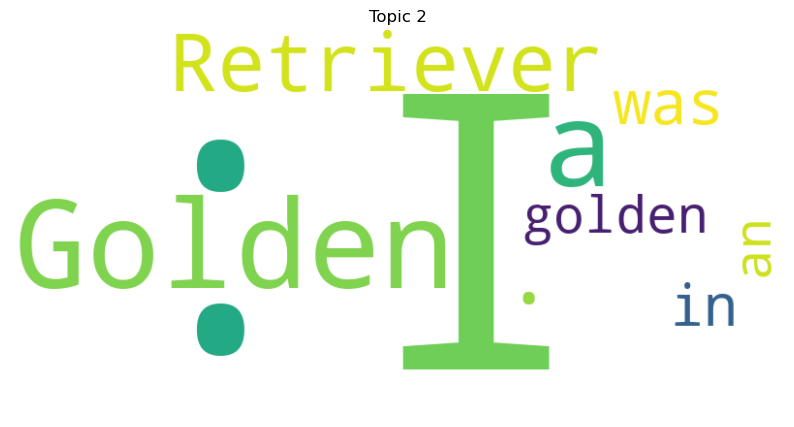

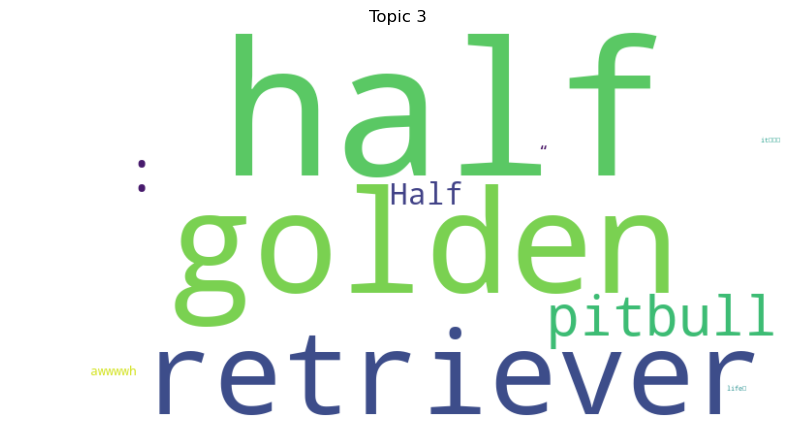

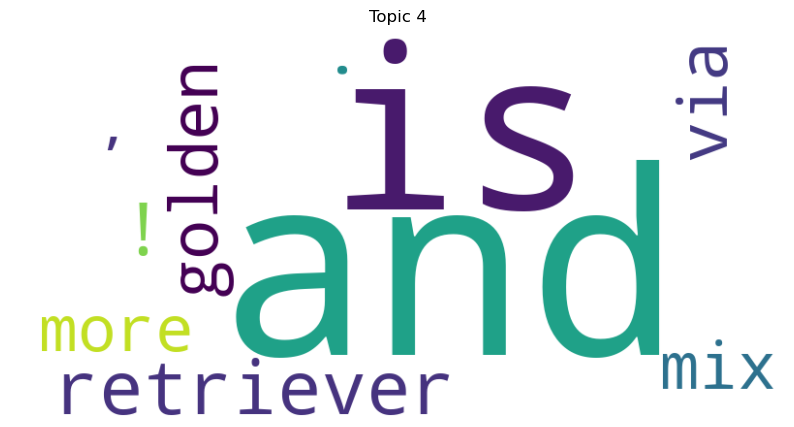

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/Users/lehman/opt/anaconda3/envs/tweet_topic_modeling/lib/python3.11/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [4]:
import re
import torch
from transformers import BertTokenizer, BertModel
from gensim.corpora import Dictionary
import gensim
import langid
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models import CoherenceModel

def preprocess_text(text):
    """Preprocess text by removing URLs, user mentions, and 'RT'."""
    return re.sub(r'http\S+|@\w+|\bRT\b', '', text)

def tokenize_and_embed_tweets(tokenizer, bert_model, tweets):
    """Tokenize and embed tweets using BERT."""
    embeddings = []
    for tweet in tweets:
        encoded_tweet = tokenizer(tweet, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = bert_model(**encoded_tweet)
        embedding = torch.mean(outputs.last_hidden_state, dim=1).squeeze().numpy()
        embeddings.append(embedding)
    return embeddings

def train_lda_model(corpus, dictionary):
    """Train an LDA model."""
    return gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5,
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

def visualize_wordclouds(lda_model):
    """Visualize Word Clouds for each topic."""
    topics = lda_model.show_topics(num_topics=-1, formatted=False)
    for topic_id, words in topics:
        word_freq = {word: freq for word, freq in words}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
        plt.show()

def visualize_pyldavis(lda_model, corpus, dictionary):
    """Visualize pyLDAvis."""
    lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
    pyLDAvis.display(lda_display)

def compute_coherence(lda_model, corpus, dictionary, texts):
    """Compute Topic Coherence."""
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Topic Coherence Score: {coherence_lda}')


# Sample list of 5000 tweet texts
tweet_texts = tweet_text  

# Keep only tweets classified as English
english_tweet_texts = [tweet for tweet in tweet_texts if langid.classify(tweet)[0] == 'en']

# Preprocess and tokenize texts
preprocessed_texts = [preprocess_text(text) for text in english_tweet_texts]

# Load BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name).eval()

# Tokenize and embed tweets using BERT
bert_embeddings = tokenize_and_embed_tweets(tokenizer, bert_model, preprocessed_texts)

# Convert BERT embeddings to a format suitable for LDA
flattened_bert_embeddings = [emb.flatten() for emb in bert_embeddings]

# Train LDA model on bag-of-words representations
lda_dictionary = Dictionary([word_tokenize(text) for text in preprocessed_texts])
bow_corpus = [lda_dictionary.doc2bow(word_tokenize(text)) for text in preprocessed_texts]
lda_model = train_lda_model(bow_corpus, lda_dictionary)

# Visualizations
visualize_wordclouds(lda_model)
#visualize_pyldavis(lda_model, bow_corpus, lda_dictionary)
compute_coherence(lda_model, bow_corpus, lda_dictionary, preprocessed_texts)


In [5]:
visualize_pyldavis(lda_model, bow_corpus, lda_dictionary)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
lda_display = gensimvis.prepare(lda_model, bow_corpus, lda_dictionary)
pyLDAvis.display(lda_display)

### Optimized code 2.1

In [ ]:
import re
import os
import concurrent.futures
from transformers import BertTokenizer, BertModel
import torch
import time
from gensim.corpora import Dictionary
import langid
from sklearn.model_selection import train_test_split
import gensim

def preprocess_text(text):
    """Preprocess text by removing URLs, user mentions, and 'RT'."""
    text = re.sub(r'http\S+|@\w+|\bRT\b', '', text)
    return text

def load_or_create_tokenizer(model_name, bert_tokenizer_file):
    """Load or create BERT tokenizer."""
    if not os.path.exists(bert_tokenizer_file):
        tokenizer = BertTokenizer.from_pretrained(model_name)
        tokenizer.save_pretrained(bert_tokenizer_file)
    else:
        tokenizer = BertTokenizer.from_pretrained(bert_tokenizer_file)
    return tokenizer

def tokenize_and_embed_tweets(tokenizer, bert_model, tweets):
    """Tokenize and embed tweets using BERT."""
    def process_tweet(tweet):
        encoded_tweet = tokenizer(tweet, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = bert_model(**encoded_tweet)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).squeeze().numpy()
        return embeddings

    with concurrent.futures.ThreadPoolExecutor() as executor:
        embeddings = list(executor.map(process_tweet, tweets))
    
    return embeddings

def create_lda_dictionary(texts):
    """Create an LDA dictionary."""
    dictionary = Dictionary(texts)
    dictionary.compactify()
    return dictionary

def train_lda_model(corpus, dictionary):
    """Train an LDA model."""
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                 id2word=dictionary,
                                                 num_topics=5,
                                                 random_state=42,
                                                 passes=10,
                                                 per_word_topics=True)
    return lda_model

# Sample list of 5000 tweet texts
tweet_texts = tweet_text  

# Keep only tweets classified as English
english_tweet_texts = [tweet for tweet in tweet_texts if langid.classify(tweet)[0] == 'en']

start = time.time()

# Preprocess and tokenize texts
preprocessed_texts = [preprocess_text(text) for text in english_tweet_texts]

end = time.time()
print("Time taken for text preprocessing:", end - start, "seconds")

start = time.time()

# Load or create BERT tokenizer
model_name = 'bert-tiny-uncased'
bert_tokenizer_file = 'bert_tokenizer.pth'
tokenizer = load_or_create_tokenizer(model_name, bert_tokenizer_file)

# Load BERT model
bert_model = BertModel.from_pretrained(model_name)
bert_model.eval()

# Tokenize and embed tweets
bert_embeddings = tokenize_and_embed_tweets(tokenizer, bert_model, preprocessed_texts)

end = time.time()
print("Time taken to tokenize and embed tweets:", end - start, "seconds")

start = time.time()

# Convert BERT embeddings to a format suitable for LDA
lda_inputs = [emb.flatten() for emb in bert_embeddings]

end = time.time()
print("Time taken for data conversion for LDA:", end - start, "seconds")

start = time.time()

# Split data into train and test sets
train_inputs, test_inputs = train_test_split(lda_inputs, test_size=0.2, random_state=42)

end = time.time()
print("Time taken for data splitting:", end - start, "seconds")

start = time.time()

# Create LDA dictionary
lda_dictionary = create_lda_dictionary(preprocessed_texts)

# Train LDA model
lda_model = train_lda_model(train_inputs, lda_dictionary)

end = time.time()
print("Time taken for LDA model training:", end - start, "seconds")

### Visualize results

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models import CoherenceModel

# Visualization 1: Word Clouds for each topic
def visualize_wordclouds(lda_model):
    topics = lda_model.show_topics(num_topics=-1, formatted=False)
    for topic_id, words in topics:
        word_freq = {word: freq for word, freq in words}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
        plt.show()

# Visualization 2: pyLDAvis
def visualize_pyldavis(lda_model, corpus, dictionary):
    lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
    pyLDAvis.display(lda_display)

# Visualization 3: Topic Coherence
def compute_coherence(lda_model, corpus, dictionary):
    coherence_model_lda = CoherenceModel(model=lda_model, texts=train_tokens, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Topic Coherence Score: {coherence_lda}')



In [ ]:
# Visualize word clouds for each topic
visualize_wordclouds(lda_model)

end = time.time()
print("Time taken for word cloud visualization:", end - start, "seconds")



In [ ]:
start = time.time()

# Visualize topics using pyLDAvis
visualize_pyldavis(lda_model, train_corpus, dictionary)

end = time.time()
print("Time taken for pyLDAvis visualization:", end - start, "seconds")



In [ ]:
start = time.time()

# Compute and print topic coherence score
compute_coherence(lda_model, train_corpus, dictionary)

end = time.time()
print("Time taken for coherence score computation:", end - start, "seconds")

In [8]:
lda_model.num_topics

5